In [1]:
import glob
import os
import re
import struct
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pynbody
import pynbody.plot as pp
import pynbody.plot.sph as sph
import scipy.interpolate
import scipy.signal

In [2]:
params = {"font.family": "serif", "mathtext.fontset": "stix"}
matplotlib.rcParams.update(params)

kpc_cgs = 3.08567758e21
G_cgs = 6.67e-8
Mo_cgs = 1.99e33
umass_GizToGas = 1.0  # 1e9Mo
umass = 1.0  # * umass_GizToGas
udist = 1.0  # kpc
uvel = np.sqrt(G_cgs * umass * Mo_cgs / (udist * kpc_cgs)) / 1e5
# uvel = 207.402593435
udens = umass * Mo_cgs / (udist * kpc_cgs) ** 3.0
utime = np.sqrt(1.0 / (udens * G_cgs))
sec2myr = 60.0 * 60.0 * 24.0 * 365.0 * 1e6

In [11]:
# Need to insert filepath here + start of filename ie. /GLX.00
filepth = "/Volumes/Yellow_Rani/SimWork/D_ff100b4_cont/GLX.0"
# filepth = '/Volumes/BigRani_Raid1/Yellow_Rani/SimWork/D_ff100bNC_cont/GLX.0'
# filepth = '/Volumes/BigRani_Raid1/Student_Backups/Noah/M1copy_Artemis/GLX.0'
# filepth = '/Users/eile0750/Desktop/Work/Tipsy_out/GLX.0'
# filepth = '/Volumes/BigRani_Raid1/Yellow_Rani/SimWork/AlexIsoNB_0628ish/GAL.000'
testname = filepth.split("/")[-2]
timestep = ["1000"]

In [12]:
i = 0
# while i<len(timestep):
filenom = filepth + timestep[i]
dno = timestep[i]
s = pynbody.load(filenom)
# params = glob.glob('*.nml')[0]
print("-------PREAMBLE-------")
s.physical_units()
print(s.families())
print(s.loadable_keys())
print(s.properties)
print(s.g)
print(s.gas.loadable_keys())
print(s.s)
print(s.star.loadable_keys())
print(s.dm.loadable_keys())

t_now = s.properties["time"].in_units("Myr")
timestr = str(np.round(float(t_now), 1))

-------PREAMBLE-------
[<Family gas>, <Family dm>, <Family star>]
['', 'u', 'eps', 'timeform', 'massform', 'HeII', 'uHot', 'pos', 'HeI', 'uDotFB', 'igasorder', 'Tinc', 'mass', 'OxMassFrac', 'vel', 'FeMassFrac', 'iord', 'phi', 'MassHot', 'HI']
{'time': Unit("1.02e+00 kpc s km**-1")}
<SimSnap "/Volumes/Yellow_Rani/SimWork/D_ff100b4_cont/GLX.01000::gas" len=4120726>
['rho', '', 'u', 'eps', 'timeform', 'massform', 'HeII', 'uHot', 'pos', 'HeI', 'metals', 'uDotFB', 'Tinc', 'mass', 'igasorder', 'OxMassFrac', 'vel', 'iord', 'FeMassFrac', 'temp', 'phi', 'MassHot', 'HI']
<SimSnap "/Volumes/Yellow_Rani/SimWork/D_ff100b4_cont/GLX.01000::star" len=4932001>
['', 'uDotFB', 'Tinc', 'mass', 'igasorder', 'OxMassFrac', 'u', 'eps', 'vel', 'timeform', 'FeMassFrac', 'iord', 'massform', 'phi', 'HeII', 'uHot', 'MassHot', 'pos', 'tform', 'HeI', 'metals', 'HI']
['', 'uDotFB', 'Tinc', 'mass', 'igasorder', 'OxMassFrac', 'u', 'eps', 'vel', 'timeform', 'FeMassFrac', 'iord', 'massform', 'phi', 'HeII', 'uHot', 'MassH

In [13]:
# Put CoM in middle
pynbody.analysis.angmom.faceon(s)
# pynbody.analysis.angmom.sideon(s)
# Rotate if we want
# s.rotate_y(180)
# s.rotate_x(180)

# Some useful filters:
# agefilt = pynbody.filt.BandPass('age','900 Myr','1000 Myr')
# sphere  = pynbody.filt.Sphere('10 kpc')

# bin stuff up radially:
r_enc = "15 kpc"
pp = pynbody.analysis.profile.Profile(s, max=r_enc, min="0.01 kpc", type="log", nbins=300)
ppd = pynbody.analysis.profile.Profile(s.dm, max=r_enc, min="0.01 kpc", type="log", nbins=300)
ppg = pynbody.analysis.profile.Profile(s.gas, max=r_enc, min="0.01 kpc", type="log", nbins=300)
pps = pynbody.analysis.profile.Profile(s.stars, max=r_enc, min="0.01 kpc", type="log", nbins=300)

print("------SETUP-DONE------")

------SETUP-DONE------


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


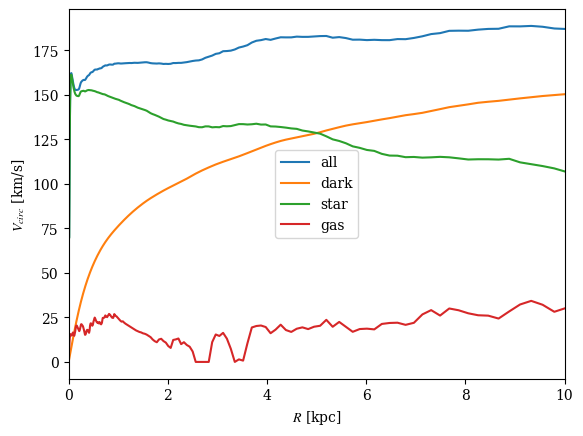

plotting stars


<Figure size 640x480 with 0 Axes>

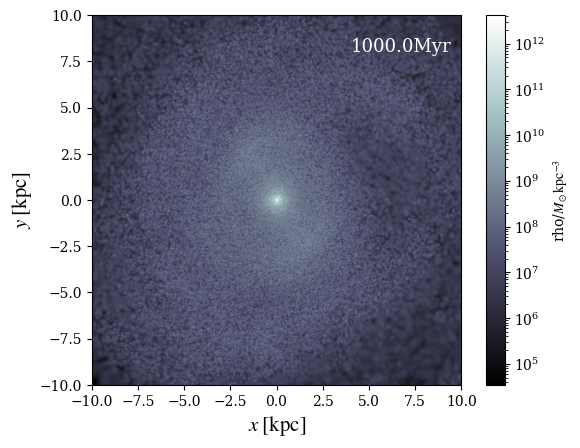

plotting gas


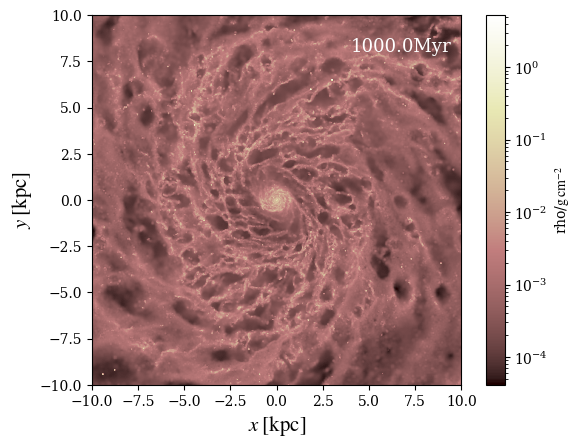

plotting DM


<Figure size 640x480 with 0 Axes>

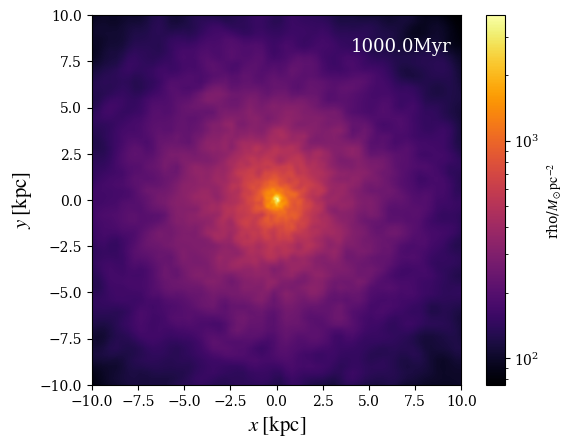

plotting velocities


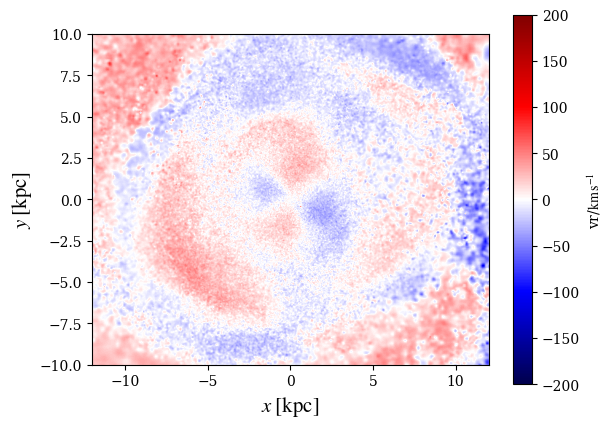

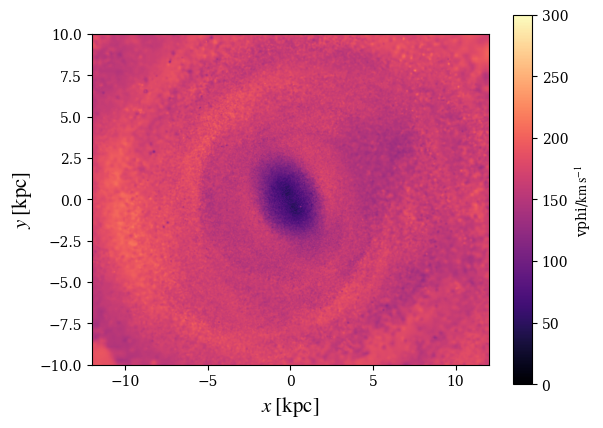

In [14]:
# Some useful plots using pynbody

# Rotation curve
plt.clf()
# plt.plot(p['rbins'],label='mod')
plt.plot(pp["rbins"], pp["v_circ"], label="all")
plt.plot(ppd["rbins"], ppd["v_circ"], label="dark")
plt.plot(pps["rbins"], pps["v_circ"], label="star")
plt.plot(ppg["rbins"], ppg["v_circ"], label="gas")
plt.legend()
plt.xlim(0, 10)
plt.xlabel("$R$ [kpc]")
plt.ylabel("$V_{circ}$ [km/s]")
plt.show()

# -- Face-on stellar density plot
print("plotting stars")
vmin = 100
vmax = 600
plt.clf()
figS = plt.figure(2)
axS = figS.add_subplot(1, 1, 1)
im_S = sph.image(s.star, qty="rho", width="20 kpc", cmap="bone", subplot=axS, show_cbar=True)
plt.xlabel("$x \;{\\rm [kpc]}$", fontsize=15)
plt.ylabel("$y \;{\\rm [kpc]}$", fontsize=15)
axS.annotate(timestr + "Myr", xy=(0.7, 0.9), xycoords="axes fraction", color="white", fontsize=13)
plt.show()
# plt.savefig('StarPrj1_'+str(dno))

# -- Face-on gas density plot
print("plotting gas")
vmin = 3e-4
vmax = 8e-2
plt.clf()
figG = plt.figure(1)
axG = figG.add_subplot(1, 1, 1)
imG = sph.image(
    s.gas, qty="rho", width="20 kpc", cmap="pink", units="g cm^-2", show_cbar=True, subplot=axG
)  # proj
plt.xlabel("$x \;{\\rm [kpc]}$", fontsize=15)
plt.ylabel("$y \;{\\rm [kpc]}$", fontsize=15)
axG.annotate(timestr + "Myr", xy=(0.7, 0.9), xycoords="axes fraction", color="white", fontsize=13)
plt.show()
# plt.savefig('GasPrj1_'+str(dno))

# -- Face-on DM density plot
print("plotting DM")
vmin = 5e1
vmax = 1e4
plt.clf()
figD = plt.figure(3)
axD = figD.add_subplot(1, 1, 1)
im_D = sph.image(
    s.dm, qty="rho", width="20 kpc", cmap="inferno", units="Msol pc^-2", show_cbar=True, subplot=axD
)  # proj
plt.xlabel("$x \;{\\rm [kpc]}$", fontsize=15)
plt.ylabel("$y \;{\\rm [kpc]}$", fontsize=15)
axD.annotate(timestr + "Myr", xy=(0.7, 0.9), xycoords="axes fraction", color="white", fontsize=13)
plt.show()
# plt.savefig('DMPrj1_'+str(dno))

print("plotting velocities")
res = 2000
cb = (True, True, True, True)
bx = 12
wx = str(2.0 * bx) + " kpc"
aza = "rho"  # uses a column average

# -- Face-on projection of Radial velocity (v_R)
plt.clf()
vmin = -200
vmax = 200
figVr = plt.figure(1)
axVr = figVr.add_subplot(1, 1, 1)
im = sph.image(
    s.star,
    qty="vr",
    width=wx,
    cmap="seismic",
    units="km s^-1",
    show_cbar=cb[0],
    resolution=res,
    log=False,
    vmin=vmin,
    vmax=vmax,
    av_z=aza,
)
plt.xlabel("$x \;{\\rm [kpc]}$", fontsize=15)
plt.ylabel("$y \;{\\rm [kpc]}$", fontsize=15)
axVr.annotate(timestr + "Myr", xy=(0.7, 0.9), xycoords="axes fraction", color="black", fontsize=13)
plt.ylim(-10, 10)
# plt.ylim(-2.5,2.5)
plt.show()
# plt.savefig('vr.png')

# -- Face-on projection of Tangential velocity (v_t)
plt.clf()
vmin = 0
vmax = 200
figVt = plt.figure(1)
axVt = figVt.add_subplot(1, 1, 1)
sph.image(
    s.star,
    qty="vphi",
    width=wx,
    cmap="magma",
    show_cbar=cb[0],
    resolution=res,
    log=False,
    units="km s^-1",
    vmin=vmin,
    vmax=vmax,
    av_z=aza,
)
plt.xlabel("$x \;{\\rm [kpc]}$", fontsize=15)
plt.ylabel("$y \;{\\rm [kpc]}$", fontsize=15)
axVt.annotate(timestr + "Myr", xy=(0.7, 0.9), xycoords="axes fraction", color="white", fontsize=13)
plt.ylim(-10, 10)
# plt.ylim(-2.5,2.5)
plt.show()
# plt.savefig('vt.png')

# Abx = sph.image(s.gas,qty='vx',width= wx,cmap='jet',units='km s^-1',show_cbar = cb[0],resolution=res,log=False,av_z=aza)#,vmin=-200,vmax=200)
# Aby = sph.image(s.gas,qty='vy',width= wx,cmap='jet',units='km s^-1',show_cbar = cb[0],resolution=res,log=False,av_z=aza)#,vmin=-200,vmax=200)
# Abz = sph.image(s.gas,qty='vz',width= wx,cmap='jet',units='km s^-1',show_cbar = cb[0],resolution=res,log=False,av_z=aza)#,vmin=-50,vmax=50)
# Ad  = sph.image(s.gas,qty='rho',width= wx,cmap='viridis',units='g cm^-2',show_cbar = cb[0],resolution=res,vmin=5e-4,vmax=2e-2,log=True)

In [22]:
print(s.gas["mass"].units)

Msol


/var/folders/m8/xdqzgv5d23zc7sygpqd4zrn00000gq/T/ipykernel_75149/1545565418.py:56: RuntimeWarning: divide by zero encountered in log10
  logsfrbin[i,j] = np.log10(sfrbin[i,j])
/var/folders/m8/xdqzgv5d23zc7sygpqd4zrn00000gq/T/ipykernel_75149/1545565418.py:73: RuntimeWarning: divide by zero encountered in divide
  sfebin=sfrbin/Mgbin
/var/folders/m8/xdqzgv5d23zc7sygpqd4zrn00000gq/T/ipykernel_75149/1545565418.py:73: RuntimeWarning: invalid value encountered in divide
  sfebin=sfrbin/Mgbin
/var/folders/m8/xdqzgv5d23zc7sygpqd4zrn00000gq/T/ipykernel_75149/1545565418.py:74: RuntimeWarning: divide by zero encountered in log10
  logsfebin=np.log10(sfebin)


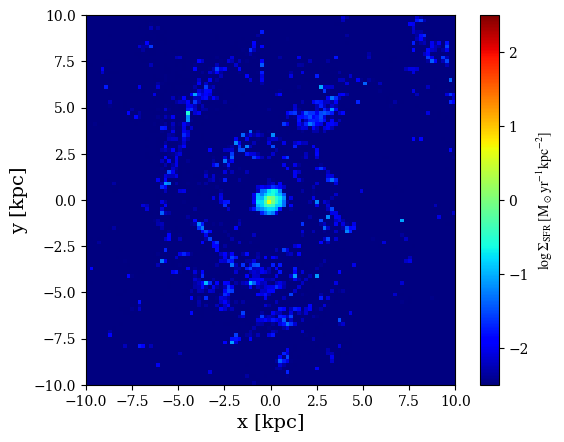

In [21]:
# to find star formation in the latest period of [dt_age]Myr i.e. 100Myr
AGE_LIM = pynbody.units.Unit("100 Myr")
R_LIM = pynbody.units.Unit("10 kpc")
Z_LIM = pynbody.units.Unit("1 kpc")
T_DELAY = pynbody.units.Unit("0 Myr")  # Ignore this time-frame of SF in past
t_off = 0
t_form = s.star["tform"].in_units("Myr") - t_off  # * utime/sec2myr

x = s.star["x"]
y = s.star["y"]
m = s.star["mass"]
mg = s.gas["mass"]
xg = s.gas["x"]
yg = s.gas["y"]
h = ["z"]

L = 10.0  # length of the box eg. 10kpc
dx = 0.1  # step size in x
dy = 0.1  # step size in y
nx = int(L / dx)  # number of steps in x
ny = int(L / dy)  # number of steps in y
dt_age = AGE_LIM.in_units("Myr")
max_height = Z_LIM.in_units("kpc")

Mbin = np.zeros((nx, ny))  # mass array
Mgbin = np.zeros((nx, ny))  # mass array
xbin = np.linspace(-L, L, nx)
ybin = np.linspace(-L, L, ny)
area = np.zeros((nx, ny))  # area array
sfrbin = np.zeros((nx, ny))  # SFR array
logsfrbin = np.zeros((nx, ny))  # logSFR array

t1 = t_now - T_DELAY.in_units("Myr") - dt_age
t2 = t_now - T_DELAY.in_units("Myr")

selage = (t_form >= t1) & (t_form <= t2)
young_m = s.star["massform"][selage]
young_x = s.star["x"][selage]
young_y = s.star["y"][selage]
young_h = np.abs(s.star["z"][selage])
sfr = young_m / (dt_age * 1e6)

i = 0
j = 0
while i < nx:
    j = 0
    while j < ny:
        x1 = xbin[i]
        x2 = x1 + dx
        y1 = ybin[j]
        y2 = y1 + dy
        selgrid = (young_x > x1) & (young_x < x2) & (young_y > y1) & (young_y < y2) & (young_h < max_height)
        Mbin[i, j] = np.sum(young_m[selgrid])
        area[i, j] = dx * dy
        sfrbin[i, j] = Mbin[i, j] / area[i, j] / (dt_age * 1e6)
        logsfrbin[i, j] = np.log10(sfrbin[i, j])
        j += 1
    i += 1
ii = 0
jj = 0
while ii < nx:
    jj = 0
    while jj < ny:
        x1 = xbin[ii]
        x2 = x1 + dx
        y1 = ybin[jj]
        y2 = y1 + dy
        selgrid = (xg > x1) & (xg < x2) & (yg > y1) & (yg < y2)
        Mgbin[ii, jj] = np.sum(mg[selgrid])
        jj += 1
    ii += 1

sfebin = sfrbin / Mgbin
logsfebin = np.log10(sfebin)

plt.imshow(np.fliplr(np.rot90(logsfrbin, k=3)), origin="lower", extent=(-L, L, -L, L), cmap="jet")
plt.clim(-2.5, 2.5)
plt.colorbar(orientation="vertical", label="$\log\Sigma_{\\rm SFR}\;{\\rm [M_\\odot yr^{-1} kpc^{-2}]}$")
ax = plt.gca()
ax.set_facecolor((0, 0, 0.5, 1))
plt.xlabel("x [kpc]", fontsize=14)
plt.ylabel("y [kpc]", fontsize=14)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
# plt.savefig('SFRPrj2_'+str(dno))

In [8]:
print(pp["v_circ"].units)
print(s["vel"].units)
print(s.star["vx"].in_units("km s^-1"))

km s**-1
km s**-1
[  59.14296422 -149.4475279   180.27842481 ... -105.83923391 -184.88796555
 -206.66824696]


(array([ 1568660.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 10300000.]),
 array([9.58757756e-04, 1.32947543e+00, 2.65799210e+00, 3.98650876e+00,
        5.31502543e+00, 6.64354210e+00, 7.97205877e+00, 9.30057544e+00,
        1.06290921e+01, 1.19576088e+01, 1.32861254e+01]),
 <BarContainer object of 10 artists>)

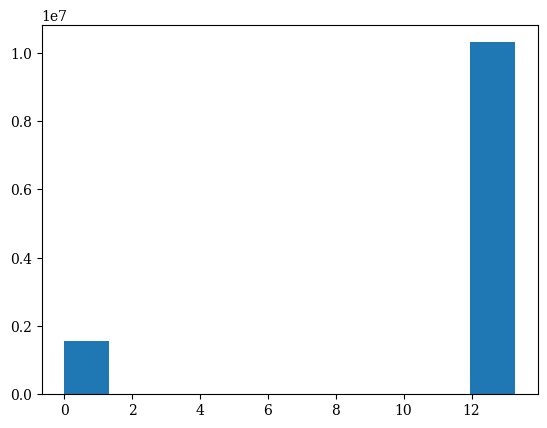

In [45]:
plt.hist(s.s["tform"])

In [ ]:
# plot the gravitational potential energy
plt.plot(s.s["r"].in_units("kpc"), s.s["phi"], "k.")
plt.plot(pp["rbins"], pp["pot"], "b.")
plt.xlim(0, 15)

In [ ]:
# Some code to save useful things as .txt files if you want

Young_Star_names = np.reshape(["snapshot", "x", "y", "z", "mass", "tform"], (1, 6))
Young_Star_units = np.reshape(["Myr", "kpc", "kpc", "kpc", "$M_{\odot}$", "Myr"], (1, 6))
Young_G_names = np.reshape(["snapshot", "x", "y", "z", "mass"], (1, 5))
Young_G_units = np.reshape(["Myr", "kpc", "kpc", "kpc", "$M_{\odot}$"], (1, 5))
Table_timeS = np.reshape(np.ones((1, len(s.star["x"]))) * int(dno), (len(s.star["x"])))
Table_timeG = np.reshape(np.ones((1, len(s.gas["x"]))) * int(dno), (len(s.gas["x"])))
print(Table_timeS[0])
s_forSFR = np.column_stack(
    (
        Table_timeS,
        s.star["x"].in_units("kpc"),
        s.star["y"].in_units("kpc"),
        s.star["z"].in_units("kpc"),
        s.star["mass"],
        s.star["tform"].in_units("Myr"),
    )
)
gas_forSFR = np.column_stack(
    (
        Table_timeG,
        s.gas["x"].in_units("kpc"),
        s.gas["y"].in_units("kpc"),
        s.gas["z"].in_units("kpc"),
        s.gas["mass"],
    )
)
Sout = np.concatenate((Young_Star_names, Young_Star_units, s_forSFR))
Gas_out = np.concatenate((Young_G_names, Young_G_units, gas_forSFR))
# print(Sout[1,:])
np.savetxt("AllStars_" + str(dno) + ".txt", Sout, fmt="%s")
np.savetxt("AllGas_" + str(dno) + ".txt", Gas_out, fmt="%s")

# Stellar velocities for (x,y,z) and (r,phi,z) co-ordinates
sVel_names = np.reshape(["snapshot", "svx", "svy", "svz", "svr", "svphi"], (1, 6))
Vel_units = np.reshape(["Myr", "km/s", "km/s", "km/s", "km/s", "km/s"], (1, 6))
Table_timeS = np.reshape(np.ones((1, len(s.star["x"]))) * int(dno), (len(s.star["x"])))
# print Table_timeS[0]
s_vel = np.column_stack(
    (
        Table_timeS,
        s.star["vx"].in_units("km s^-1"),
        s.star["vy"].in_units("km s^-1"),
        s.star["vz"].in_units("km s^-1"),
        s.star["vr"].in_units("km s^-1"),
        s.star["vphi"].in_units("km s^-1"),
    )
)
Svout = np.concatenate((sVel_names, Vel_units, s_vel))
# print(Svout[1,:])
np.savetxt("AllStarsV_" + str(dno) + ".txt", Svout, fmt="%s")